<a href="https://colab.research.google.com/github/xavoliva6/oml_project/blob/main/src/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Federated Machine Learning with Differential Privacy

**Clone Repo**<br/>
Run the following cells in Google Colab in order to clone the code from Github to your Google Drive or pull the latest changes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
# Run this cell if you did not clone the repo yet
! git clone https://github.com/xavoliva6/dpfl_pytorch.git OPT4ML

fatal: destination path 'OPT4ML' already exists and is not an empty directory.


In [12]:
# Run this cell to pull the latest changes
%cd /content/gdrive/My Drive/OPT4ML
! git config --global user.email "student@epfl.ch"
! git config --global user.name "Student"
! git stash
! git pull origin main

/content/gdrive/My Drive/OPT4ML
Saved working directory and index state WIP on main: 94fd8e4 removed device from parameter tensor
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 12 (delta 6), reused 12 (delta 6), pack-reused 0
Unpacking objects: 100% (12/12), done.
From https://github.com/jan-kreischer/EPFL_OPT4ML
 * branch            main       -> FETCH_HEAD
   94fd8e4..0a022b1  main       -> origin/main
Updating 94fd8e4..0a022b1
Fast-forward
 src/data/MED/diagnosis.data  | Bin 0 -> 7276 bytes
 src/data/MED/diagnosis.names | 109 +++++++++++++++
 src/index.ipynb              | 313 ++++++++++++++++++++++++++++++++-----------
 src/server.py                |   2 +-
 4 files changed, 342 insertions(+), 82 deletions(-)
 create mode 100644 src/data/MED/diagnosis.data
 create mode 100644 src/data/MED/diagnosis.names


**Colab Support**<br/>
Only run the following lines if you want to run the code on Google Colab

In [1]:
# Enable access to files stored in Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/OPT4ML/src

/content/gdrive/My Drive/OPT4ML/src


# Main

In [3]:
# Install necessary requirements
!pip install -r ../requirements.txt

In [4]:
# Make sure cuda support is available
import torch
if torch.cuda.is_available():  
  device_name = "cuda:0" 
else:  
  device_name = "cpu"  
print("device_name: {}".format(device_name))
device = torch.device(device_name)

device_name: cuda:0


In [5]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from utils import *

from model import CNN
from server import Server


In [6]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")

In [20]:
# --- TRAINING PARAMETERS ---
# NR_CLIENTS ... Number of clients participating in the training process.
# LR ... Learning rate used for the stochastic gradient descent.
# CLIENT EPOCHS ... Number of epochs that every client is trained during every step.
# NR_TRAINING_ROUNDS ... Number of times that the server performs a global model update.
# IS_PARALLEL ... Is the training of the clients performed in parallel.
# DATA ... Dataset to be used. Either 'MNIST', 'MED' or 'FEMNIST'.
# BATCH_SIZE ... Batch size used by SGD algorithm.

In [21]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
# IS PRIVATE ... 
# MAX_GRAD_NORM
# EPSILON
# EPISILON_TRAINING_ITERATION
# VIRTUAL_BATCH_SIZE
# N_ACCUMULATION_STEPS

## 1. Experiments on Medical Dataset
In the first experiment we are comparing the accuracy of a fed ml approach including privacy 

In [22]:
data = "MED"
batch_size = 32

### Experiment 1.1

In [26]:
# --- TRAINING PARAMETERS ---
nr_clients = 3
lr = 0.01
client_epochs = 10 
nr_training_rounds = 100
is_parallel = False
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = False
max_grad_norm = 1.2
epsilon = 5
epsilon_training_iteration = epsilon / nr_training_rounds
virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [27]:
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, device=device, verbose="server")
test_losses, test_accs = server(early=True, patience=10, delta=0.05)

--- Configuration ---
nr_clients: 3
nr_training_rounds: 100
lr: 0.01
epochs: 10
data: MED
batch_size: 32
max_grad_norm: 1.2
epsilon: 5
n_accumulation_steps: 2
epsilon_training_iteration: 0.05
is_parallel: False
is_private: False
device: <class 'torch.device'>
verbose: server
MED
False
--- Training ---
Round 1, test_loss: 0.7801, test_acc: 0.5
Validation loss decreased (inf --> 0.780135).  Saving model ...
Round 2, test_loss: 1.5571, test_acc: 0.5
EarlyStopping counter: 1 out of 10
Round 3, test_loss: 1.5336, test_acc: 0.5
EarlyStopping counter: 2 out of 10
Round 4, test_loss: 1.5273, test_acc: 0.5
EarlyStopping counter: 3 out of 10
Round 5, test_loss: 1.5212, test_acc: 0.5
EarlyStopping counter: 4 out of 10
Round 6, test_loss: 1.5151, test_acc: 0.5
EarlyStopping counter: 5 out of 10
Round 7, test_loss: 1.5091, test_acc: 0.5
EarlyStopping counter: 6 out of 10
Round 8, test_loss: 1.5032, test_acc: 0.5
EarlyStopping counter: 7 out of 10
Round 9, test_loss: 1.4972, test_acc: 0.5
EarlyStopp

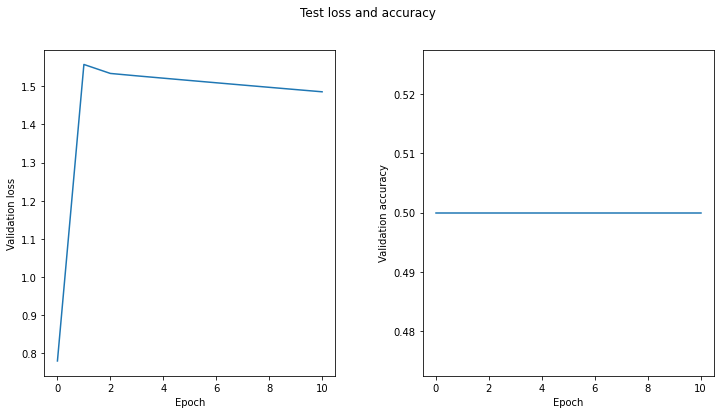

In [28]:
plot_metrics(test_losses, test_accs)

In [13]:
nr_clienst=1
is_private=False
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, device=device, verbose="server")
test_losses, test_accs = server(early=False, patience=3, delta=0.05)

--- Configuration ---
nr_clients: 3
nr_training_rounds: 100
lr: 0.01
epochs: 10
data: MED
batch_size: 10
max_grad_norm: 1.2
epsilon: 5
n_accumulation_steps: 2
epsilon_training_iteration: 0.05
is_parallel: True
is_private: False
device: <class 'torch.device'>
verbose: server
MED
False
--- Training ---
Round 1, test_loss: 1.8944, test_acc: 0.5416666666666666
Round 2, test_loss: 6.0960, test_acc: 0.4583333333333333
Round 3, test_loss: 3.4299, test_acc: 0.4583333333333333
Round 4, test_loss: 3.9562, test_acc: 0.4583333333333333
Round 5, test_loss: 3.9712, test_acc: 0.5416666666666666
Round 6, test_loss: 1.7027, test_acc: 0.8333333333333334
Round 7, test_loss: 3.5561, test_acc: 0.5416666666666666
Round 8, test_loss: 2.2477, test_acc: 0.5416666666666666
Round 9, test_loss: 1.5086, test_acc: 0.8333333333333334
Round 10, test_loss: 1.8163, test_acc: 0.7083333333333334
Round 11, test_loss: 1.4301, test_acc: 1.0
Round 12, test_loss: 1.7356, test_acc: 0.7083333333333334
Round 13, test_loss: 1.394

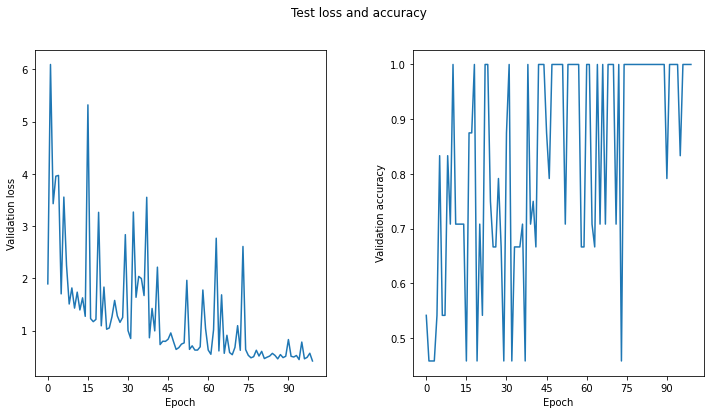

In [14]:
plot_metrics(test_losses, test_accs)

## 2. Experiments on MNIST Dataset

In [45]:
data = 'MNIST'
batch_size = 64

In [46]:
# --- TRAINING PARAMETERS ---
nr_clients = 3
lr = 0.01
client_epochs = 10 
nr_training_rounds = 20
is_parallel = True

In [47]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = False
max_grad_norm = 1.2
epsilon = 5
epsilon_training_iteration = epsilon / nr_training_rounds
virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [49]:
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, verbose="server")
test_losses, test_accs = server(early=True, patience=5, delta=0.05)

--- Configuration ---
nr_clients: 3
nr_training_rounds: 20
lr: 0.01
epochs: 10
data: MNIST
batch_size: 64
max_grad_norm: 1.2
epsilon: 5
n_accumulation_steps: 2
epsilon_training_iteration: 0.25
is_parallel: True
is_private: False
device: <class 'torch.device'>
verbose: server
MNIST
True
--- Training ---
[Client 1]	Train Epoch: 1	Loss: 0.3555
[Client 0]	Train Epoch: 1	Loss: 0.2953
[Client 2]	Train Epoch: 1	Loss: 0.2914


KeyboardInterrupt: ignored

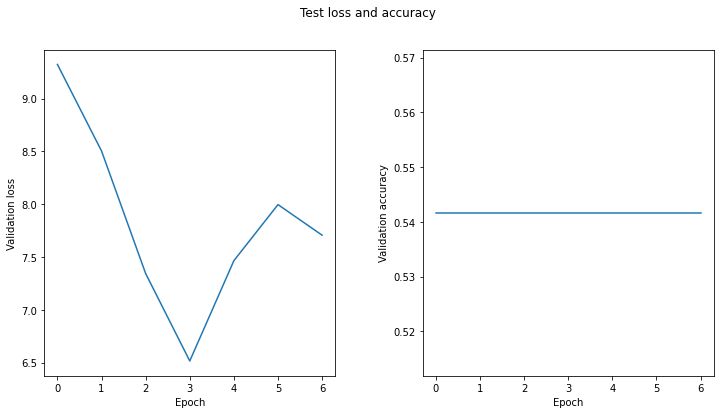

In [ ]:
plot_metrics(test_losses, test_accs)

In [38]:
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, device=device, is_private=is_private)
test_losses, test_accs = server(early=True, patience=5, delta=0.05)

--- Configuration ---
nr_clients: 3
nr_training_rounds: 20
lr: 0.01
epochs: 2
data: FEMNIST
batch_size: 64
max_grad_norm: 1.2
epsilon: 5
n_accumulation_steps: 2
epsilon_training_iteration: 0.25
is_parallel: True
is_private: False
device: <class 'torch.device'>
verbose: all
FEMNIST
False
--- Loading Data ---


ValueError: ignored

## 3. Experiments on FEMNIST Dataset

In [12]:
data = "FEMNIST"
batch_size = 64

In [13]:
# --- TRAINING PARAMETERS ---
nr_clients = 3
lr = 0.01
client_epochs = 10
nr_training_rounds = 20
is_parallel = True

In [14]:
# --- DIFFERENTIAL PRIVACY PARAMETERS ---
is_private = False
max_grad_norm = 1.2
epsilon = 5
epsilon_training_iteration = epsilon / nr_training_rounds
virtual_batch_size = 2 * batch_size
assert virtual_batch_size % batch_size == 0  # VIRTUAL_BATCH_SIZE should be divisible by BATCH_SIZE
n_accumulation_steps = int(virtual_batch_size / batch_size)

In [17]:
torch.cuda.empty_cache()
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, device=device, verbose="server")
test_losses, test_accs = server(early=True, patience=3, delta=0.05)

--- Configuration ---
nr_clients: 3
nr_training_rounds: 20
lr: 0.01
epochs: 10
data: FEMNIST
batch_size: 64
max_grad_norm: 1.2
epsilon: 5
n_accumulation_steps: 2
epsilon_training_iteration: 0.25
is_parallel: True
is_private: False
device: <class 'torch.device'>
verbose: server
FEMNIST
False
--- Loading Data ---
Loaded Test Data
Loaded Training Data
--- Training ---
Round 1, test_loss: 22.1679, test_acc: 0.9744634279807868
Validation loss decreased (inf --> 22.167900).  Saving model ...
Round 2, test_loss: 14.8070, test_acc: 0.9833404268255609
Validation loss decreased (22.167900 --> 14.806954).  Saving model ...
Round 3, test_loss: 12.6056, test_acc: 0.9856508785796801
Validation loss decreased (14.806954 --> 12.605563).  Saving model ...
Round 4, test_loss: 11.4353, test_acc: 0.9877181248859974
Validation loss decreased (12.605563 --> 11.435339).  Saving model ...
Round 5, test_loss: 10.8013, test_acc: 0.9884477412294035
Validation loss decreased (11.435339 --> 10.801332).  Saving mod

In [ ]:
plot_metrics(test_losses, test_accs)

In [ ]:
is_private = True
server = Server(nr_clients=nr_clients, nr_training_rounds=nr_training_rounds, lr=lr, epochs=client_epochs, data=data, batch_size=batch_size, max_grad_norm=max_grad_norm, epsilon=epsilon, n_accumulation_steps=n_accumulation_steps, epsilon_training_iteration=epsilon_training_iteration, is_parallel=is_parallel, is_private=is_private, device=device, verbose="all")
test_losses, test_accs = server(early=True, patience=3, delta=0.05)

In [ ]:
plot_metrics(test_losses, test_accs)